In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [6]:
scaled_np = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_np, columns=df.columns)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [7]:
scaled_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
data.target_names

['MedHouseVal']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_df, data.target, test_size=0.2)


In [11]:
x_train.shape, y_train.shape

((16512, 8), (16512,))

In [12]:
model = tf.keras.Sequential(

     [
         # INCEPUT -> neschimbabil -> data.data
        tf.keras.Input(shape=(8,)),

        # 1. Adaugare mai multor straturi ( layere)
        tf.keras.layers.Dense(64, activation="relu"),

         # 2. Adaugarea mai multor neurori ( hidden units)
         tf.keras.layers.Dense(32,  activation="relu"),




        ## OUTPUT -> neschimbabil
        tf.keras.layers.Dense(1) # output -> data.target_names -> ['MedHouseVal']

     ]
)

In [13]:
# 4. Schimbare optimizatorului

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    # 5. Schimbarea learning rate-utului din optimizator
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [14]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
history

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6590 - mae: 0.9037 - val_loss: 0.5971 - val_mae: 0.4894
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4475 - mae: 0.4723 - val_loss: 0.4153 - val_mae: 0.4488
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3978 - mae: 0.4492 - val_loss: 0.3798 - val_mae: 0.4366
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3661 - mae: 0.4339 - val_loss: 0.4283 - val_mae: 0.4313
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3419 - mae: 0.4157 - val_loss: 0.3490 - val_mae: 0.4190
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3345 - mae: 0.4093 - val_loss: 0.3521 - val_mae: 0.4097
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3168 - mae: 0.3979 - val_loss: 0.4036 - val_mae: 0.4081
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3268 - mae: 0.3981 - val_loss: 0.3566 - val_mae: 0.3975
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [15]:
type(history)

keras.src.callbacks.history.History

In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [17]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae
0,0.893303,0.647807,0.597050,0.489362
1,0.425159,0.465549,0.415255,0.448755
2,0.380180,0.441248,0.379832,0.436585
3,0.361853,0.428963,0.428343,0.431289
4,0.343111,0.415195,0.349009,0.419040
...,...,...,...,...
95,0.231791,0.330791,0.316248,0.354560
96,0.228049,0.327659,0.310745,0.355698
97,0.228176,0.328470,0.332077,0.359784
98,0.228440,0.328252,0.281236,0.357933


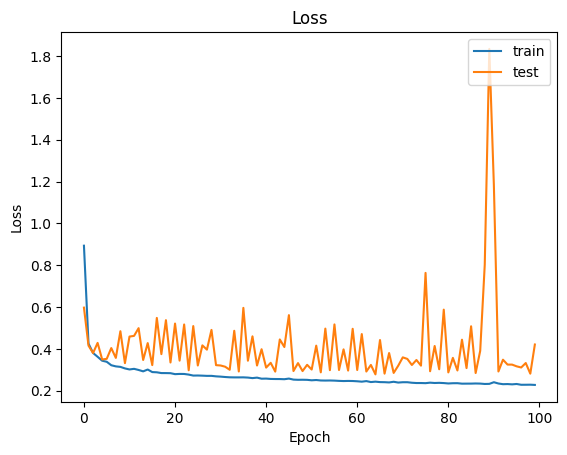

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

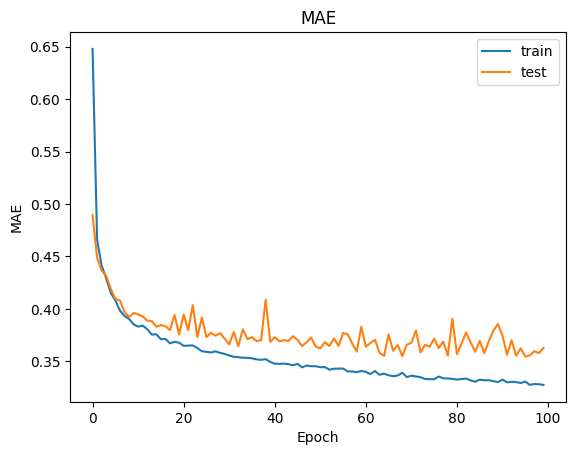

In [19]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])

plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [25]:
model_50 = tf.keras.Sequential(

     [
         # INCEPUT -> neschimbabil -> data.data
        tf.keras.Input(shape=(8,)),

        # 1. Adaugare mai multor straturi ( layere)
        tf.keras.layers.Dense(64, activation="relu"),

         # 2. Adaugarea mai multor neurori ( hidden units)
         tf.keras.layers.Dense(32,  activation="relu"),




        ## OUTPUT -> neschimbabil
        tf.keras.layers.Dense(1) # output -> data.target_names -> ['MedHouseVal']

     ]
)

In [26]:
model_50.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    # 5. Schimbarea learning rate-utului din optimizator
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [27]:
history_50 = model_50.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
history_50

Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.7278 - mae: 0.9509 - val_loss: 0.5765 - val_mae: 0.4873
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4413 - mae: 0.4739 - val_loss: 0.4319 - val_mae: 0.4463
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3786 - mae: 0.4392 - val_loss: 0.3967 - val_mae: 0.4368
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3354 - mae: 0.4144 - val_loss: 0.3715 - val_mae: 0.4227
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3343 - mae: 0.4122 - val_loss: 0.3373 - val_mae: 0.4129
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3192 - mae: 0.3978 - val_loss: 0.6229 - val_mae: 0.4215
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2989 - mae: 0.3864 - val_loss: 0.3474 - val_mae: 0.3936
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3097 - mae: 0.3872 - val_loss: 0.3751 - val_mae: 0.3913
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

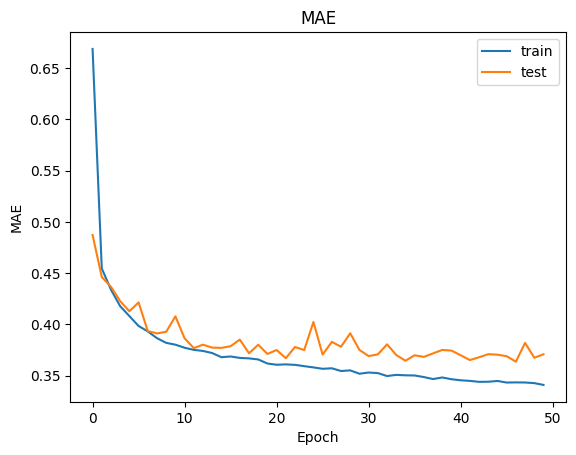

In [28]:
plt.plot(history_50.history["mae"])
plt.plot(history_50.history["val_mae"])

plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

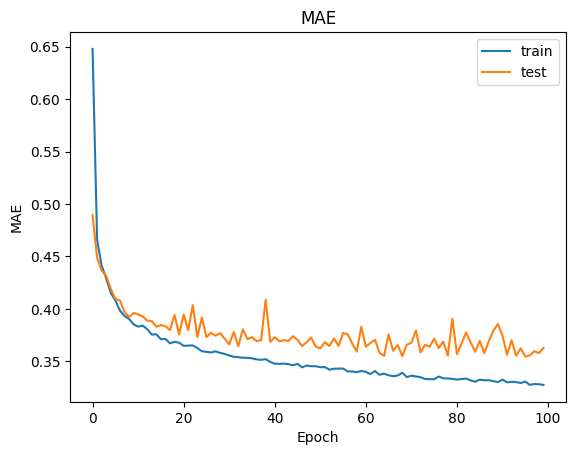

In [29]:
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])

plt.title("MAE")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()